## Data Understanding

### Objective 1 Attract and Retain High-Value Customers 2. Enhance Marketing Performance

### Banking Dataset - Marketing Targets (marketing.csv)
(Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets)


In [2]:
# optional to run by colab
# from google.colab import files
# Upload file
# uploaded = files.upload()


In [3]:
!pip install pydot

In [4]:
import pandas as pd
import numpy as np
import statsmodels as sm
import pylab as pl
from scipy import stats
from six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [5]:
# read the csv file
marketing_data = pd.read_csv('marketing.csv', sep=';')


In [6]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
marketing_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
marketing_data.shape

(45211, 17)

In [9]:
# preliminary check any missing data for the feature columns
marketing_data.isnull().any()
# outcomes are good with values, no null cells

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [10]:
# Remove rows where balance is negative
marketing_data = marketing_data[marketing_data['balance'] >= 0]
# Verify the changes
print(marketing_data.info())  # Check the new number of entries
print(marketing_data['balance'].min())  # Should be 0 or higher


<class 'pandas.core.frame.DataFrame'>
Index: 41445 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41445 non-null  int64 
 1   job        41445 non-null  object
 2   marital    41445 non-null  object
 3   education  41445 non-null  object
 4   default    41445 non-null  object
 5   balance    41445 non-null  int64 
 6   housing    41445 non-null  object
 7   loan       41445 non-null  object
 8   contact    41445 non-null  object
 9   day        41445 non-null  int64 
 10  month      41445 non-null  object
 11  duration   41445 non-null  int64 
 12  campaign   41445 non-null  int64 
 13  pdays      41445 non-null  int64 
 14  previous   41445 non-null  int64 
 15  poutcome   41445 non-null  object
 16  y          41445 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.7+ MB
None
0


In [11]:
marketing_data.shape
# After removing balance < 0, about (41445/45211) 9% removed

(41445, 17)

<Axes: ylabel='Frequency'>

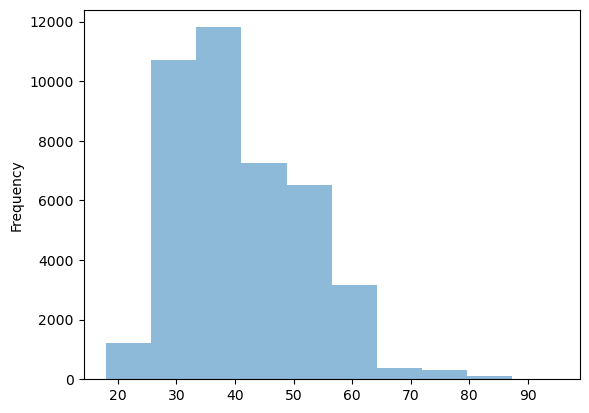

In [12]:
# Create bins dynamically from min to max age with 10-year intervals
marketing_data['age'].plot.hist(bins=10, alpha=0.5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1912\839862124.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_balance = marketing_data.groupby('age_group')['balance'].sum()


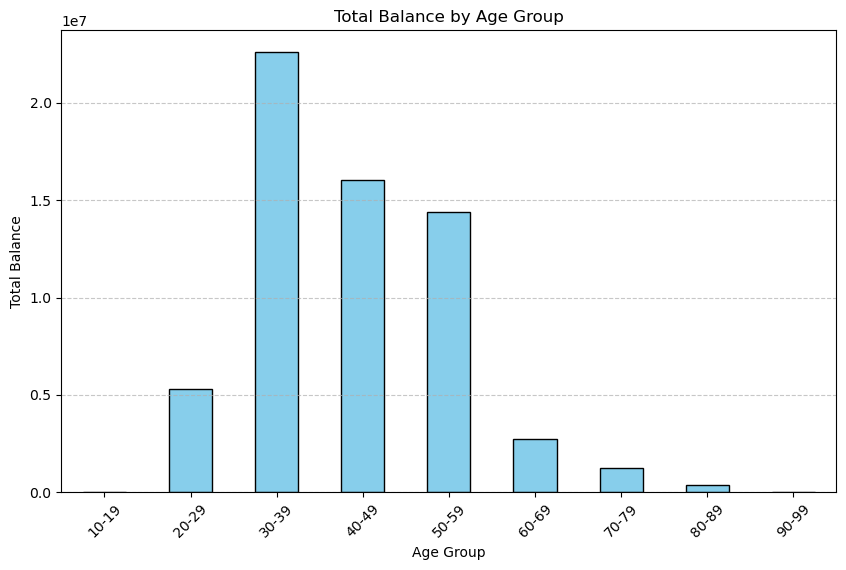

In [13]:
# Define age bins and labels
bins = list(range(10, 101, 10))  # Age groups: 10-19, 20-29, ..., 90-99, 100+
labels = [f"{i}-{i+9}" for i in range(10, 100, 10)]

# Create an 'age_group' column
marketing_data['age_group'] = pd.cut(marketing_data['age'], bins=bins, labels=labels, right=False)
marketing_data['age_group_num'] = pd.factorize(marketing_data['age_group'])[0]
# Group by age_group and calculate total balance
age_balance = marketing_data.groupby('age_group')['balance'].sum()

# Plot the histogram
plt.figure(figsize=(10, 6))
age_balance.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel("Age Group")
plt.ylabel("Total Balance")
plt.title("Total Balance by Age Group")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines

# Show the plot
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1912\1682805984.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


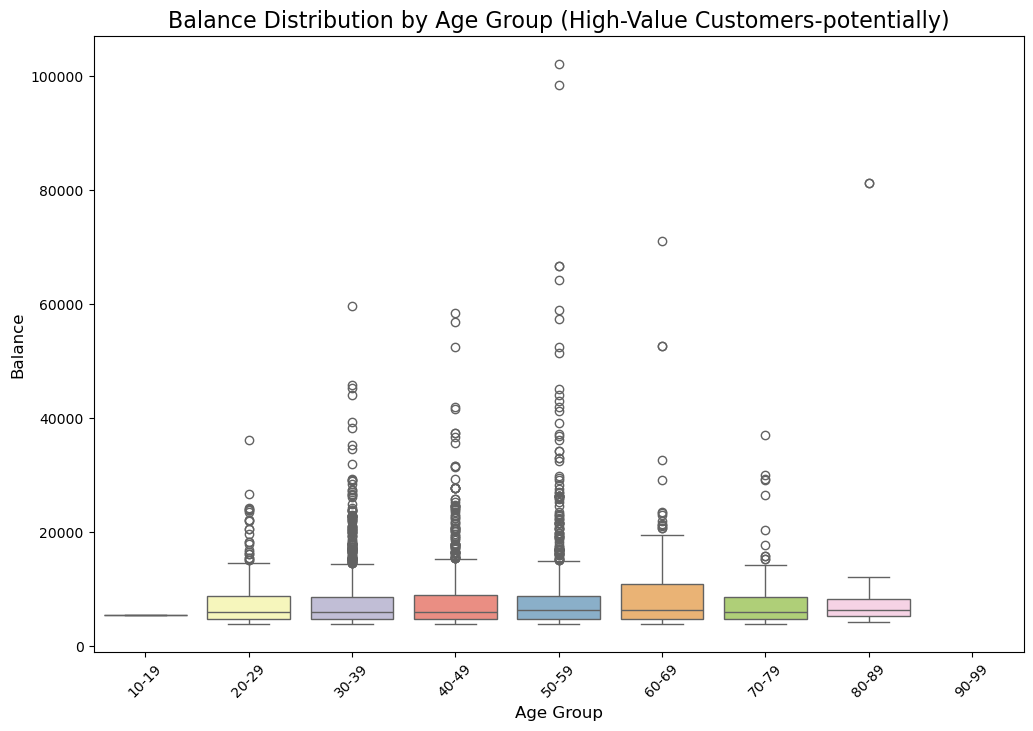

In [14]:
# Preliminary explore the potential High-Value Customers by Age
# Filter high-value customers based on balance (e.g., top 10%)
high_value_marketing_data = marketing_data[marketing_data['balance'] > marketing_data['balance'].quantile(0.9)]  # Top 10% based on balance

# Plot box plot for balance by age group
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="age_group",   # Age group on x-axis
    y="balance",     # Balance on y-axis
    data=high_value_marketing_data,  # Filtered high-value customers
    palette="Set3"
)

# Customize chart
plt.title("Balance Distribution by Age Group (High-Value Customers-potentially)", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [15]:
marketing_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41445 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            41445 non-null  int64   
 1   job            41445 non-null  object  
 2   marital        41445 non-null  object  
 3   education      41445 non-null  object  
 4   default        41445 non-null  object  
 5   balance        41445 non-null  int64   
 6   housing        41445 non-null  object  
 7   loan           41445 non-null  object  
 8   contact        41445 non-null  object  
 9   day            41445 non-null  int64   
 10  month          41445 non-null  object  
 11  duration       41445 non-null  int64   
 12  campaign       41445 non-null  int64   
 13  pdays          41445 non-null  int64   
 14  previous       41445 non-null  int64   
 15  poutcome       41445 non-null  object  
 16  y              41445 non-null  object  
 17  age_group      41445 non-null  categ

In [16]:
# job category
jobs = ", ".join(marketing_data['job'].drop_duplicates())
print(jobs)

management, technician, entrepreneur, blue-collar, unknown, retired, admin., services, self-employed, unemployed, housemaid, student


In [18]:
# Get unique jobs and assign numbers, like a dictionary
job_mapping = {job: i+1 for i, job in enumerate(marketing_data['job'].drop_duplicates())}

# Map the job column to numbers
marketing_data['job_number'] = marketing_data['job'].map(job_mapping)

# Display the mapping
print(job_mapping)


{'management': 1, 'technician': 2, 'entrepreneur': 3, 'blue-collar': 4, 'unknown': 5, 'retired': 6, 'admin.': 7, 'services': 8, 'self-employed': 9, 'unemployed': 10, 'housemaid': 11, 'student': 12}


C:\Users\Admin\AppData\Local\Temp\ipykernel_1912\2377895637.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=job_counts.index, y=job_counts.values, palette="viridis")


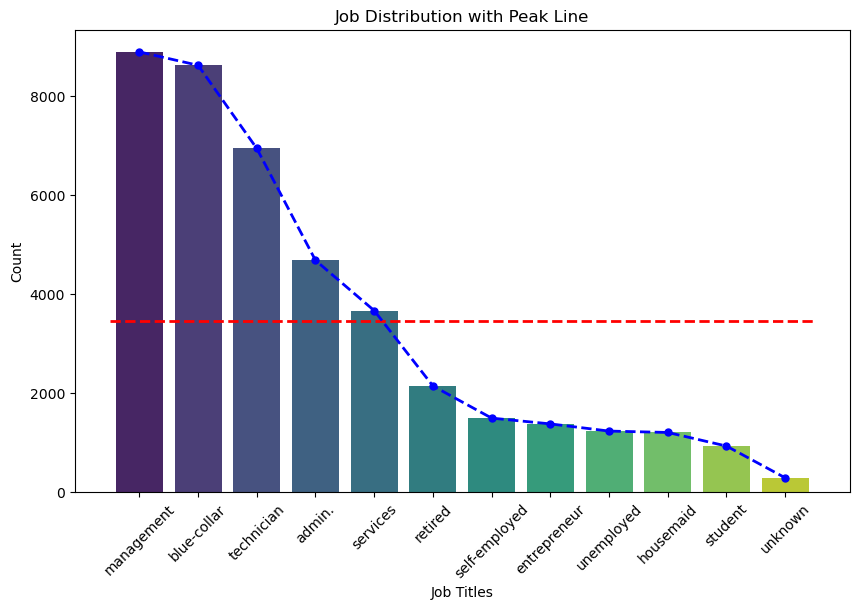

In [19]:
# Count the number of occurrences for each job
job_counts = marketing_data['job'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=job_counts.index, y=job_counts.values, palette="viridis")

# Get x and y coordinates for the peak line
x_values = np.arange(len(job_counts))  # X-coordinates (bar positions)
y_values = job_counts.values  # Y-coordinates (bar heights)

# Compute mid-points (average of top bar heights)
mid_y = job_counts.values.mean()

# Draw a horizontal line at the midpoint of all bars
plt.hlines(y=mid_y, xmin=-0.5, xmax=len(job_counts) - 0.5, colors='red', linestyles='dashed', linewidth=2)

# Draw a line connecting the peaks of the bars
plt.plot(x_values, y_values, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=5)

# Customize labels and title
plt.xlabel("Job Titles")
plt.ylabel("Count")
plt.title("Job Distribution with Peak Line")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.show()


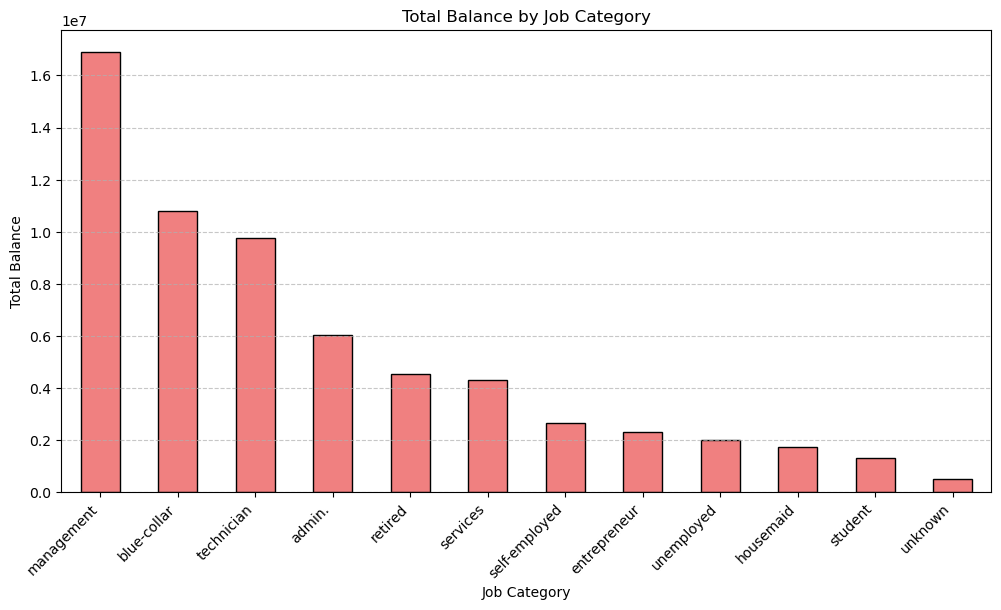

In [20]:
# Group by job and calculate total balance
job_balance = marketing_data.groupby('job')['balance'].sum().sort_values(ascending=False)  # Sort for better visualization

# Plot the histogram (bar chart)
plt.figure(figsize=(12, 6))
job_balance.plot(kind='bar', color='lightcoral', edgecolor='black')

# Customize the plot
plt.xlabel("Job Category")
plt.ylabel("Total Balance")
plt.title("Total Balance by Job Category")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines

# Show the plot
plt.show()


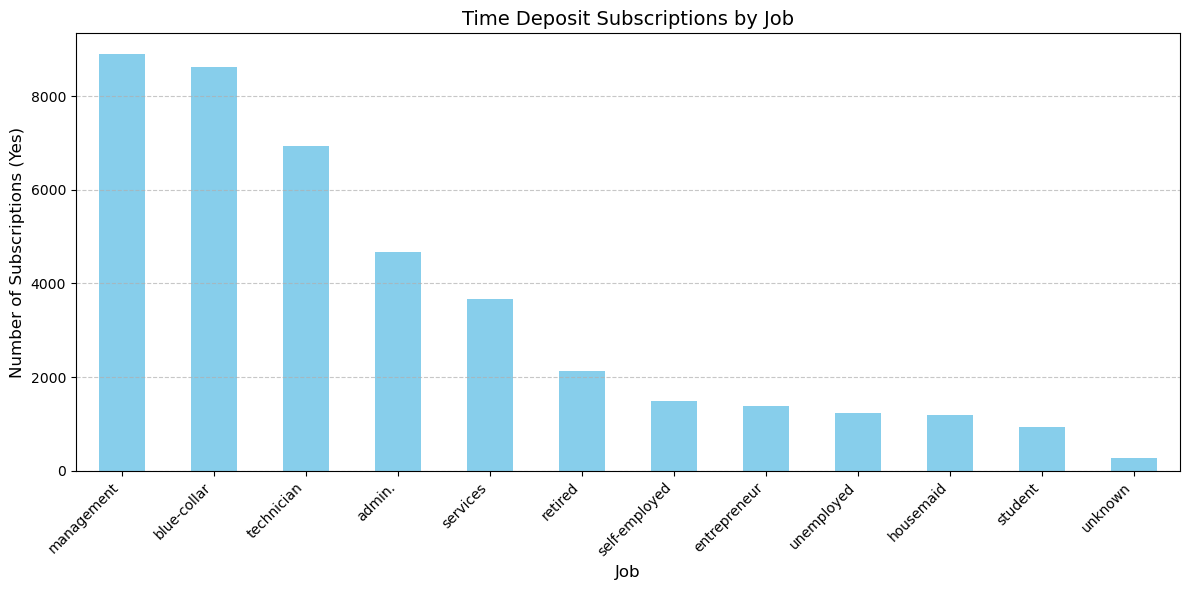

In [21]:
# Filter for clients who subscribed to the term deposit
subscribed = marketing_data[marketing_data['y'] == 'yes']

# Count subscriptions per job category (sorted by count)
job_counts = marketing_data['job'].value_counts()

# Create the plot
plt.figure(figsize=(12, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Time Deposit Subscriptions by Job', fontsize=14)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Number of Subscriptions (Yes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

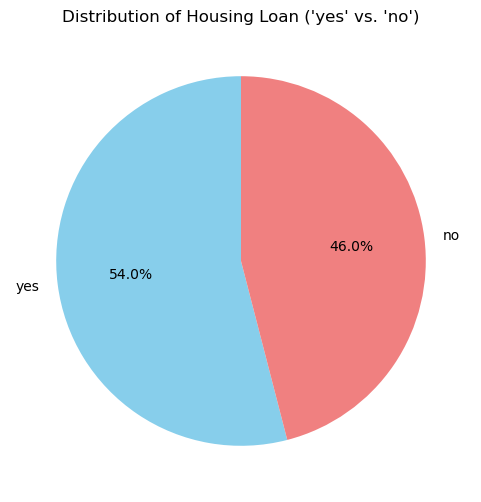

In [22]:
# Count occurrences of "yes" and "no" in the "housing" column
housing_counts = marketing_data['housing'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)

# Add title
plt.title("Distribution of Housing Loan ('yes' vs. 'no')")

# Show plot
plt.show()

In [23]:
# job category
housings = ", ".join(marketing_data['housing'].drop_duplicates())
print(housings)

yes, no


C:\Users\Admin\AppData\Local\Temp\ipykernel_1912\3148146459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')


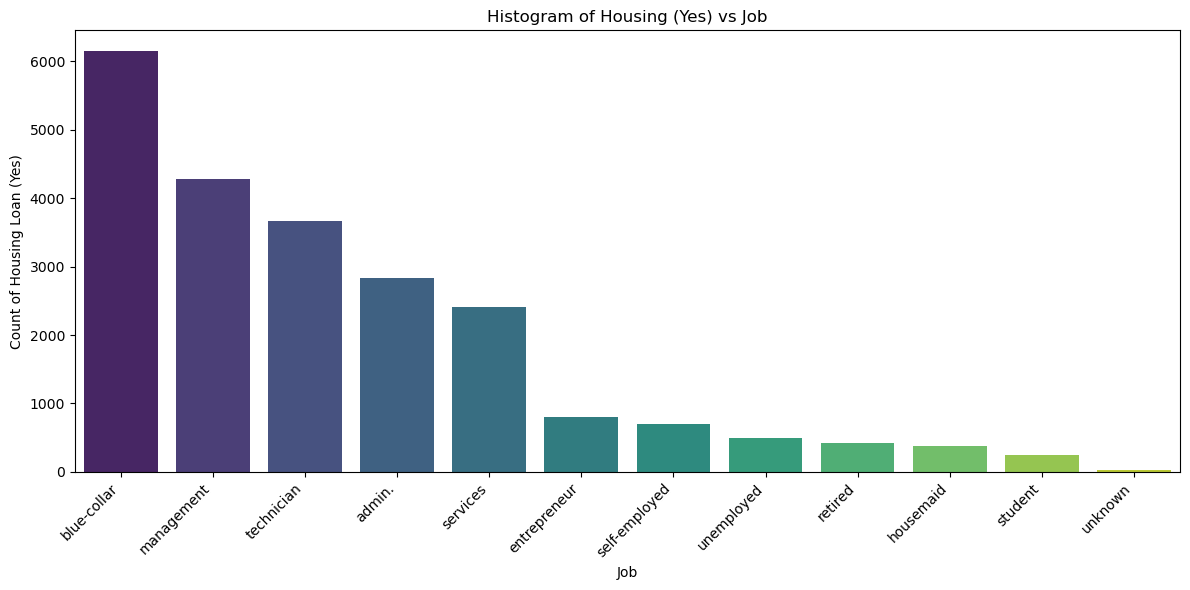

In [24]:
housing_yes = marketing_data[marketing_data['housing'] == 'yes']

# Group by 'job' and count the occurrences
job_counts = housing_yes['job'].value_counts()

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Histogram of Housing (Yes) vs Job')
plt.xlabel('Job')
plt.ylabel('Count of Housing Loan (Yes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [25]:
# education category
educations = ", ".join(marketing_data['education'].drop_duplicates())
print(educations)

tertiary, secondary, unknown, primary


C:\Users\Admin\AppData\Local\Temp\ipykernel_1912\4161238745.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")


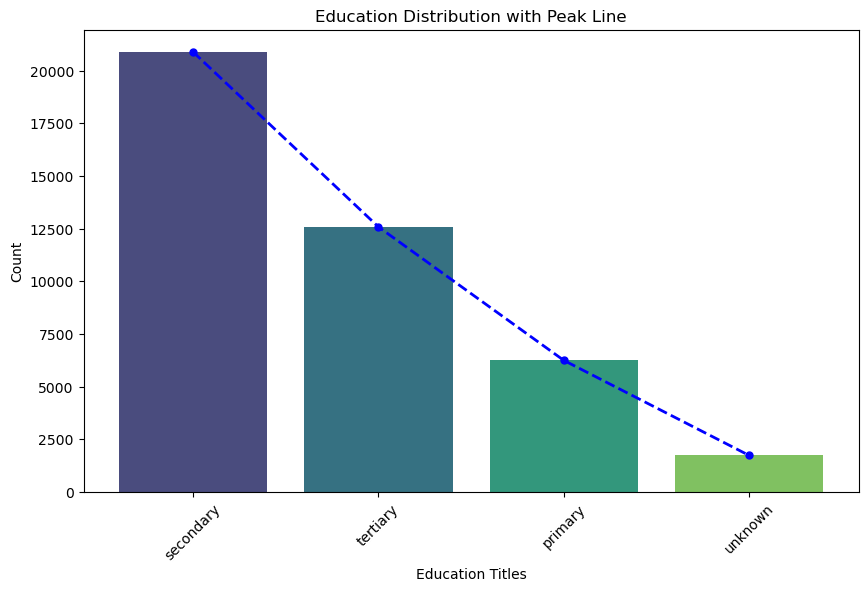

In [26]:
# Count the number of occurrences for each job
education_counts = marketing_data['education'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")

# Get x and y coordinates for the peak line
x_values = np.arange(len(education_counts))  # X-coordinates (bar positions)
y_values = education_counts.values  # Y-coordinates (bar heights)

# Compute mid-points (average of top bar heights)
mid_y = education_counts.values.mean()

# Draw a line connecting the peaks of the bars
plt.plot(x_values, y_values, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=5)

# Customize labels and title
plt.xlabel("Education Titles")
plt.ylabel("Count")
plt.title("Education Distribution with Peak Line")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.show()


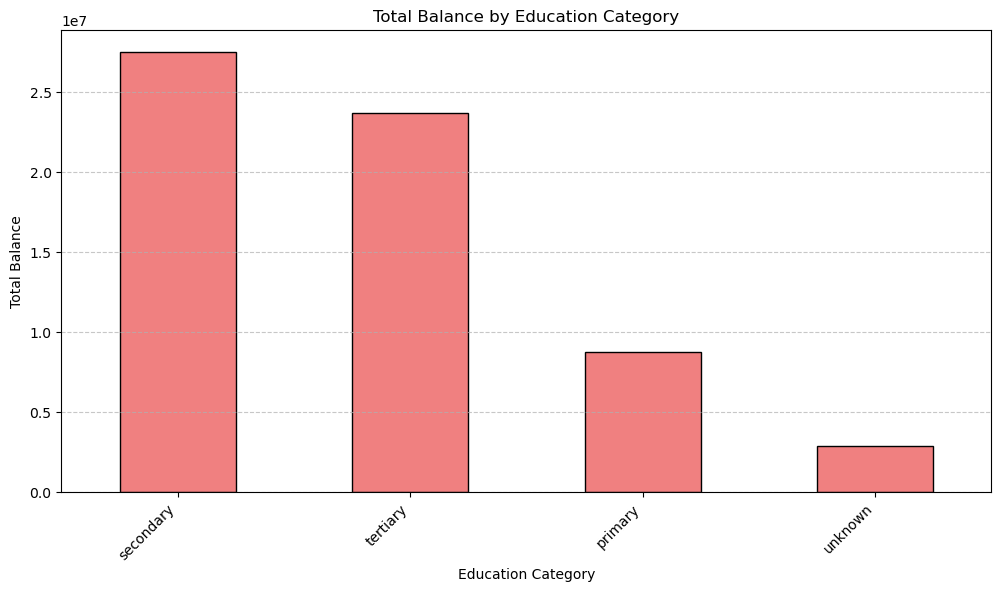

In [27]:
# Group by education and calculate total balance
job_balance = marketing_data.groupby('education')['balance'].sum().sort_values(ascending=False)  # Sort for better visualization

# Plot the histogram (bar chart)
plt.figure(figsize=(12, 6))
job_balance.plot(kind='bar', color='lightcoral', edgecolor='black')

# Customize the plot
plt.xlabel("Education Category")
plt.ylabel("Total Balance")
plt.title("Total Balance by Education Category")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines

# Show the plot
plt.show()

In [28]:
# Get unique marital and assign numbers, like a dictionary
marital_mapping = {marital: i+1 for i, marital in enumerate(marketing_data['marital'].drop_duplicates())}

# Map the marital column to numbers
marketing_data['marital_number'] = marketing_data['marital'].map(marital_mapping)

# Display the mapping
print(marital_mapping)



{'married': 1, 'single': 2, 'divorced': 3}


C:\Users\Admin\AppData\Local\Temp\ipykernel_1912\684426017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=marital_counts.index, y=marital_counts.values, palette="viridis")


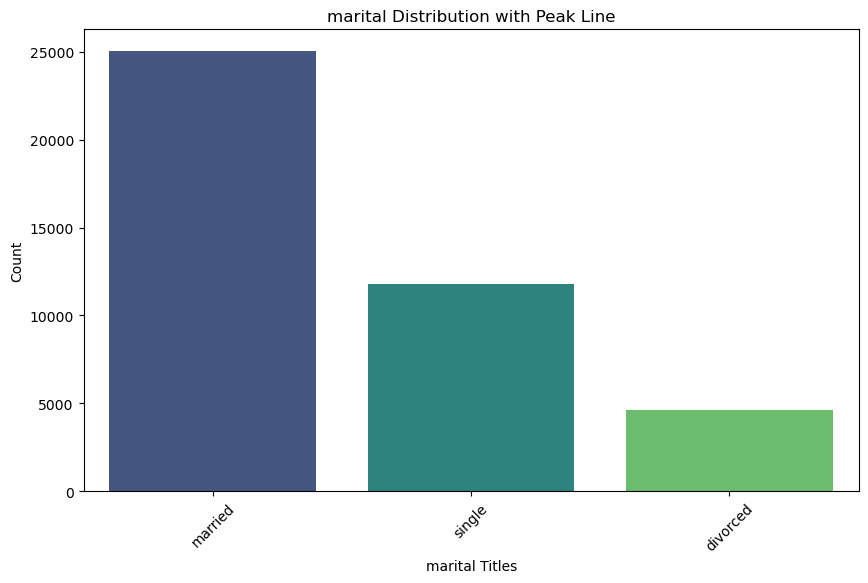

In [29]:
# Count the number of occurrences for each job
marital_counts = marketing_data['marital'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=marital_counts.index, y=marital_counts.values, palette="viridis")

# Customize labels and title
plt.xlabel("marital Titles")
plt.ylabel("Count")
plt.title("marital Distribution with Peak Line")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.show()


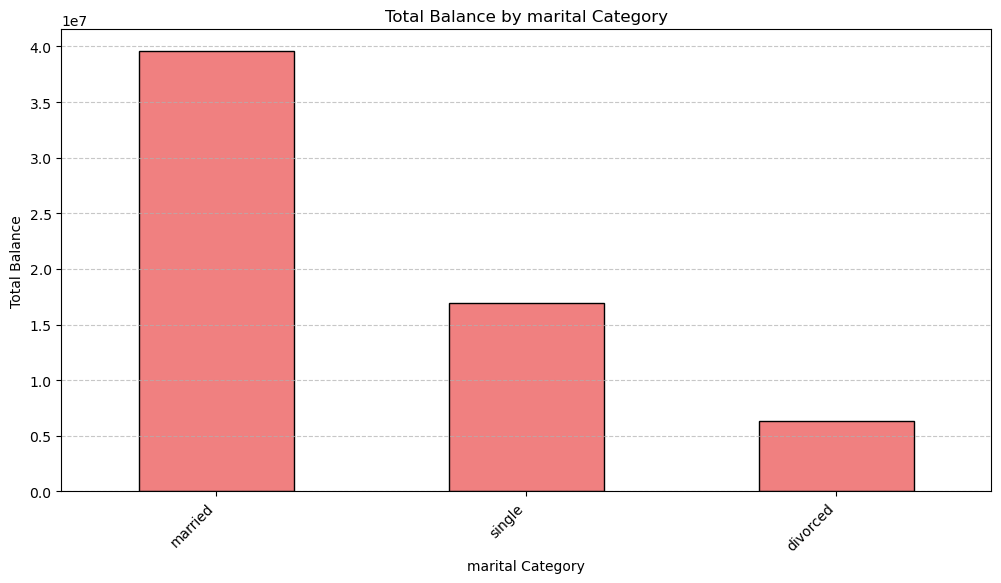

In [30]:
# Group by marital status and calculate total balance
job_balance = marketing_data.groupby('marital')['balance'].sum().sort_values(ascending=False)  # Sort for better visualization

# Plot the histogram (bar chart)
plt.figure(figsize=(12, 6))
job_balance.plot(kind='bar', color='lightcoral', edgecolor='black')

# Customize the plot
plt.xlabel("marital Category")
plt.ylabel("Total Balance")
plt.title("Total Balance by marital Category")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines

# Show the plot
plt.show()

In [32]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41445 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41445 non-null  int64   
 1   job             41445 non-null  object  
 2   marital         41445 non-null  object  
 3   education       41445 non-null  object  
 4   default         41445 non-null  object  
 5   balance         41445 non-null  int64   
 6   housing         41445 non-null  object  
 7   loan            41445 non-null  object  
 8   contact         41445 non-null  object  
 9   day             41445 non-null  int64   
 10  month           41445 non-null  object  
 11  duration        41445 non-null  int64   
 12  campaign        41445 non-null  int64   
 13  pdays           41445 non-null  int64   
 14  previous        41445 non-null  int64   
 15  poutcome        41445 non-null  object  
 16  y               41445 non-null  object  
 17  age_group       4

C:\Users\Admin\AppData\Local\Temp\ipykernel_1912\2983558379.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=y_counts.index, y=y_counts.values, palette="viridis")


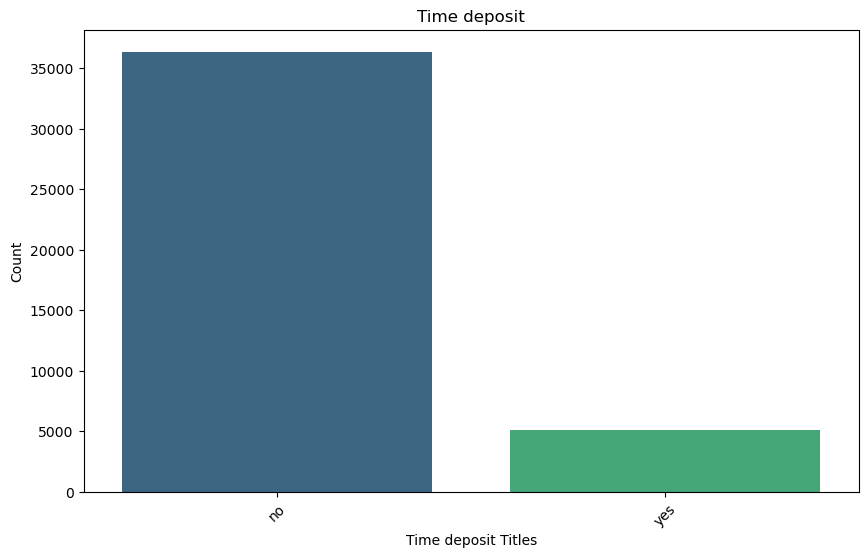

In [33]:
# Count the number of occurrences for each y-time deposit status
y_counts = marketing_data['y'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=y_counts.index, y=y_counts.values, palette="viridis")

# Get x and y coordinates for the peak line
x_values = np.arange(len(y_counts))  # X-coordinates (bar positions)
y_values = y_counts.values  # Y-coordinates (bar heights)

# Customize labels and title
plt.xlabel("Time deposit Titles")
plt.ylabel("Count")
plt.title("Time deposit")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.show()

In [42]:
# about 12% customers have time deposit account, bank has the opportunity to marketing at this products, perhaps

C:\Users\Admin\AppData\Local\Temp\ipykernel_1912\226171852.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')


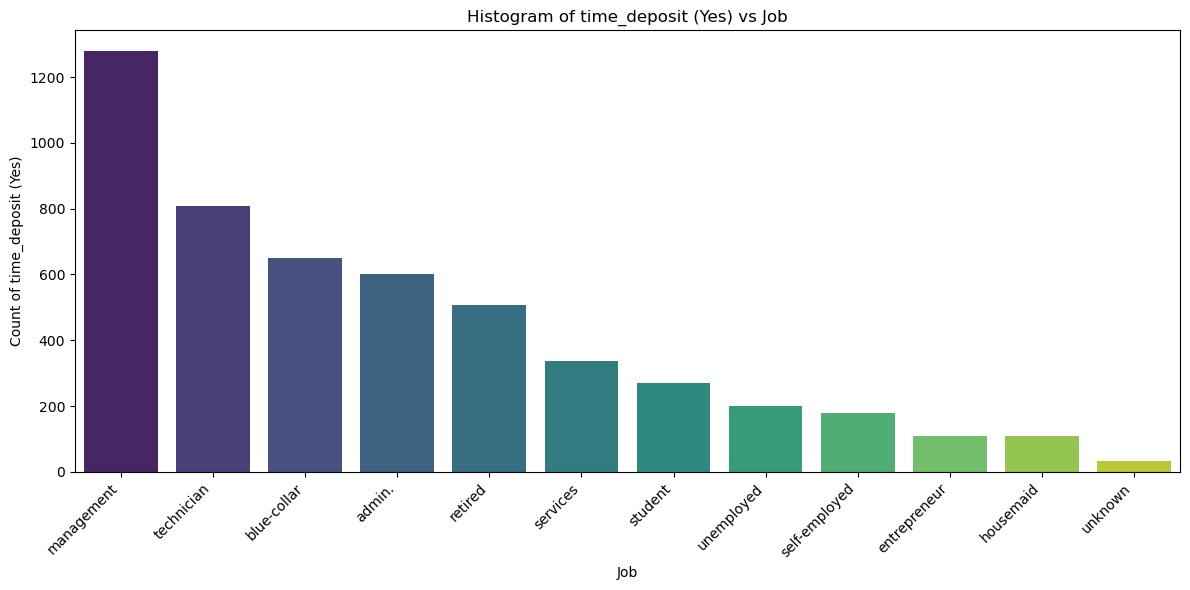

In [45]:
time_deposit_yes = marketing_data[marketing_data['y'] == 'yes']

# Group by 'job' and count the occurrences
job_counts = time_deposit_yes['job'].value_counts()

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Histogram of time_deposit (Yes) vs Job')
plt.xlabel('Job')
plt.ylabel('Count of time_deposit (Yes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

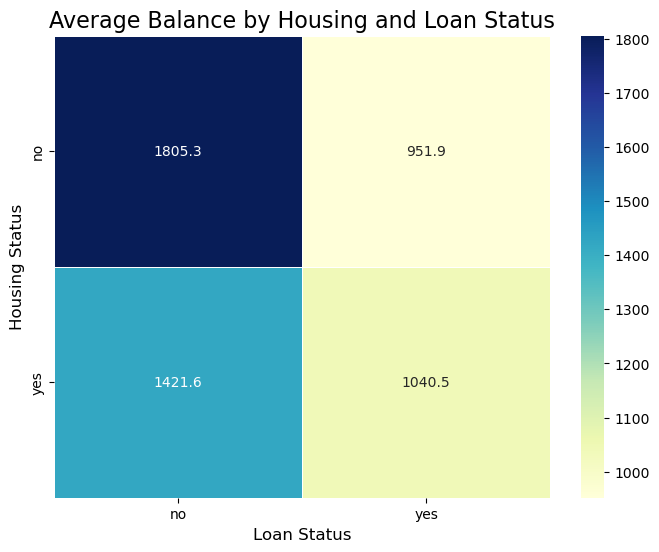

In [50]:
# another source of income for the bank is Loan services, e.g. housing loans
# Pivot table to calculate average balance by housing and loan status
pivot = pd.pivot_table(marketing_data, values='balance', index='housing', columns='loan', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)

# Customize chart
plt.title("Average Balance by Housing and Loan Status", fontsize=16)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Housing Status", fontsize=12)
plt.show()


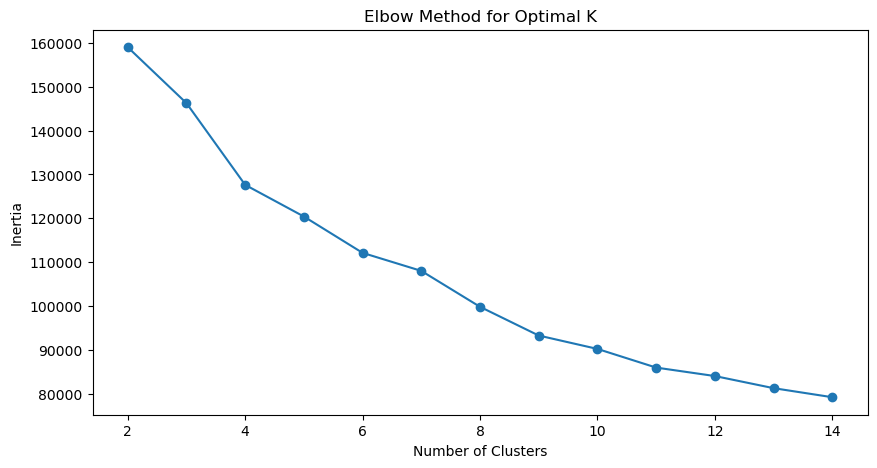

High-Value Customers belong to Cluster: 2


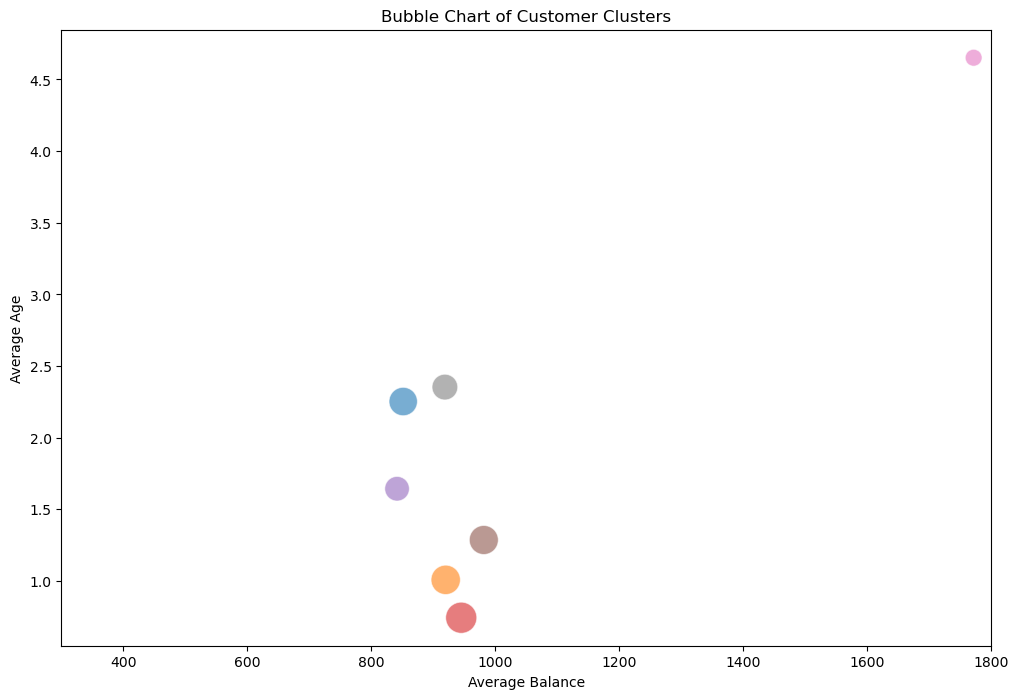

In [410]:
# Use the pipeline based modeling, automates preprocessing, handles mixed data types, prevents data leakage
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

# Select relevant numerical features
numerical_features = ['balance','age_group_num']

# Select categorical features
categorical_features = ['job', 'marital', 'education', 'housing']

# Preprocessing: Scaling and Encoding
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Preprocessing data
X_preprocessed = preprocessor.fit_transform(marketing_data)

# Determine optimal K using Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_preprocessed, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Select the best K (e.g., from the elbow point, say K=10)
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=123)
marketing_data['cluster'] = kmeans.fit_predict(X_preprocessed)

# Cluster summary based on the mean of features
cluster_summary = marketing_data.groupby('cluster')[['balance', 'age_group_num']].mean()
cluster_summary = marketing_data.groupby('cluster').agg({
    'balance': 'mean',
    'age_group_num': 'mean',
    'job': lambda x: x.mode()[0],  # Most frequent job
    'marital': lambda x: x.mode()[0],
    'education': lambda x: x.mode()[0],
    'housing': lambda x: x.mode()[0],

})

# Analyzing High-Value Customers
high_value_cluster = cluster_summary.sort_values(by='balance', ascending=False).index[0]
print(f"High-Value Customers belong to Cluster: {high_value_cluster}")

# Prepare data for Bubble Chart
# Get cluster sizes (number of customers in each cluster)
cluster_sizes = marketing_data['cluster'].value_counts()

# Merge cluster sizes into cluster summary
cluster_summary['size'] = cluster_sizes
cluster_summary.reset_index(inplace=True)

# Bubble Chart
plt.figure(figsize=(12, 8))

# Create a scatterplot
scatter = sns.scatterplot(data=cluster_summary,
                x='balance', y='age_group_num',
                size='size', sizes=(50, 500),  # Bubble size based on cluster size
                hue='cluster', palette='tab10',
                alpha=0.6, legend=False)

# Set x-axis limits to zoom in
plt.xlim(300, 1800)  # Limits for average balance

# Adding title and labels
plt.title('Bubble Chart of Customer Clusters')
plt.xlabel('Average Balance')
plt.ylabel('Average Age')

# Custom legend: create a legend for cluster colors
handles, labels = scatter.get_legend_handles_labels()
legend_labels = []
cluster_features = cluster_summary[['cluster', 'job', 'marital', 'education']].set_index('cluster')

# Create legend entries for each cluster
for i in range(len(handles)):
    cluster_id = int(labels[i])
    features = cluster_features.loc[cluster_id]
    legend_labels.append(f'Cluster {cluster_id}:\nJob: {features.job}, Marital: {features.marital}, Education: {features.education}')






**The Elbow Method** is a technique used in clustering analysis (e.g., K-means clustering) to determine the optimal number of clusters (
k
k) by balancing model complexity and explanatory power. The goal is to find the "elbow" point in a plot of Within-Cluster Sum of Squares (WCSS) vs.
k
k, where adding more clusters no longer significantly improves the model.

In [412]:
# Filter and display all customers belonging to Cluster 2
cluster_2_customers = marketing_data[marketing_data['cluster'] == 2]
print(cluster_2_customers)


       age            job   marital  education default  balance housing loan  \
446     39     technician    single    unknown      no    45248     yes   no   
920     44         admin.   married  secondary      no    58544     yes   no   
2778    45     management   married   tertiary      no    37378     yes   no   
3197    43         admin.    single  secondary      no    56831      no   no   
9425    59      housemaid  divorced  secondary      no    45141      no   no   
9536    58   entrepreneur   married    primary      no    52499      no   no   
12926   56    blue-collar   married  secondary      no    58932      no   no   
13154   56   entrepreneur   married   tertiary      no    51439      no  yes   
14816   31     management    single   tertiary      no    38279      no   no   
15869   38         admin.    single   tertiary      no    45789      no   no   
19410   55   entrepreneur   married   tertiary      no    41923      no   no   
19420   59         admin.   married    u

## Alternatively Try the Plain K-Means

In [69]:
# Convert all numeric-looking columns to int64
marketing_data = marketing_data.apply(pd.to_numeric, errors='coerce').astype('Int64')

# Verify the conversion
print(marketing_data.dtypes)



age               Int64
job               Int64
marital           Int64
education         Int64
default           Int64
balance           Int64
housing           Int64
loan              Int64
contact           Int64
day               Int64
month             Int64
duration          Int64
campaign          Int64
pdays             Int64
previous          Int64
poutcome          Int64
y                 Int64
age_group         Int64
age_group_num     Int64
job_number        Int64
marital_number    Int64
dtype: object


In [70]:
# Standardize text values: strip spaces and convert to lowercase
marketing_data["housing"] = marketing_data["housing"].astype(str).str.strip().str.lower()
marketing_data["loan"] = marketing_data["loan"].astype(str).str.strip().str.lower()

# Map values again and replace NaN with 0
marketing_data["housing"] = marketing_data["housing"].map({"yes": 1, "no": 0}).fillna(0)
marketing_data["loan"] = marketing_data["loan"].map({"yes": 1, "no": 0}).fillna(0)

# Verify the changes
marketing_data[["housing", "loan"]].head()

,housing,loan
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [73]:
marketing_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_group,age_group_num,job_number,marital_number
0,58,<NA>,<NA>,<NA>,<NA>,2143,0.0,0.0,<NA>,5,...,261,1,-1,0,<NA>,<NA>,<NA>,0,1,1
1,44,<NA>,<NA>,<NA>,<NA>,29,0.0,0.0,<NA>,5,...,151,1,-1,0,<NA>,<NA>,<NA>,1,2,2
2,33,<NA>,<NA>,<NA>,<NA>,2,0.0,0.0,<NA>,5,...,76,1,-1,0,<NA>,<NA>,<NA>,2,3,1
3,47,<NA>,<NA>,<NA>,<NA>,1506,0.0,0.0,<NA>,5,...,92,1,-1,0,<NA>,<NA>,<NA>,1,4,1
4,33,<NA>,<NA>,<NA>,<NA>,1,0.0,0.0,<NA>,5,...,198,1,-1,0,<NA>,<NA>,<NA>,2,5,2


In [75]:
marketing_data.describe


<bound method NDFrame.describe of        age   job  marital  education  default  balance  housing  loan  \
0       58  <NA>     <NA>       <NA>     <NA>     2143      0.0   0.0   
1       44  <NA>     <NA>       <NA>     <NA>       29      0.0   0.0   
2       33  <NA>     <NA>       <NA>     <NA>        2      0.0   0.0   
3       47  <NA>     <NA>       <NA>     <NA>     1506      0.0   0.0   
4       33  <NA>     <NA>       <NA>     <NA>        1      0.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
45206   51  <NA>     <NA>       <NA>     <NA>      825      0.0   0.0   
45207   71  <NA>     <NA>       <NA>     <NA>     1729      0.0   0.0   
45208   72  <NA>     <NA>       <NA>     <NA>     5715      0.0   0.0   
45209   57  <NA>     <NA>       <NA>     <NA>      668      0.0   0.0   
45210   37  <NA>     <NA>       <NA>     <NA>     2971      0.0   0.0   

       contact  day  ...  duration  campaign  pdays  previous  poutcome     y  \
0       

In [77]:
marketing_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_group,age_group_num,job_number,marital_number
0,58,<NA>,<NA>,<NA>,<NA>,2143,0.0,0.0,<NA>,5,...,261,1,-1,0,<NA>,<NA>,<NA>,0,1,1
1,44,<NA>,<NA>,<NA>,<NA>,29,0.0,0.0,<NA>,5,...,151,1,-1,0,<NA>,<NA>,<NA>,1,2,2
2,33,<NA>,<NA>,<NA>,<NA>,2,0.0,0.0,<NA>,5,...,76,1,-1,0,<NA>,<NA>,<NA>,2,3,1
3,47,<NA>,<NA>,<NA>,<NA>,1506,0.0,0.0,<NA>,5,...,92,1,-1,0,<NA>,<NA>,<NA>,1,4,1
4,33,<NA>,<NA>,<NA>,<NA>,1,0.0,0.0,<NA>,5,...,198,1,-1,0,<NA>,<NA>,<NA>,2,5,2


In [79]:
# Our selected features
features_to_explore = ['age_group_num',	'job_number',	'marital_number', 'age', 'balance', 'housing', 'loan']

In [81]:
print(features_to_explore)

['age_group_num', 'job_number', 'marital_number', 'age', 'balance', 'housing', 'loan']


In [83]:
marketing_data[features_to_explore].head()

,age_group_num,job_number,marital_number,age,balance,housing,loan
0,0,1,1,58,2143,0.0,0.0
1,1,2,2,44,29,0.0,0.0
2,2,3,1,33,2,0.0,0.0
3,1,4,1,47,1506,0.0,0.0
4,2,5,2,33,1,0.0,0.0


In [85]:
marketing_data[features_to_explore].describe()

,age_group_num,job_number,marital_number,age,balance,housing,loan
count,41445.0,41445.0,41445.0,41445.0,41445.0,41445.0,41445.0
mean,1.597008,4.530052,1.50824,41.0685,1514.924744,0.0,0.0
std,1.140895,3.132786,0.688056,10.738871,3133.829437,0.0,0.0
min,0.0,1.0,1.0,18.0,0.0,0.0,0.0
25%,1.0,2.0,1.0,33.0,146.0,0.0,0.0
50%,2.0,4.0,1.0,39.0,542.0,0.0,0.0
75%,2.0,7.0,2.0,49.0,1596.0,0.0,0.0
max,8.0,12.0,3.0,95.0,102127.0,0.0,0.0


In [87]:
# Let's try arbitrarily 3 clusters 

km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
marketing_data['cluster'] = km.fit_predict(marketing_data[features_to_explore])



In [89]:
marketing_data['cluster']

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    1
45209    0
45210    0
Name: cluster, Length: 41445, dtype: int32

In [91]:
# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

In [93]:
marketing_data[features_to_explore]

,age_group_num,job_number,marital_number,age,balance,housing,loan
0,0,1,1,58,2143,0.0,0.0
1,1,2,2,44,29,0.0,0.0
2,2,3,1,33,2,0.0,0.0
3,1,4,1,47,1506,0.0,0.0
4,2,5,2,33,1,0.0,0.0
...,...,...,...,...,...,...,...
45206,0,2,1,51,825,0.0,0.0
45207,6,6,3,71,1729,0.0,0.0
45208,6,6,1,72,5715,0.0,0.0
45209,0,4,1,57,668,0.0,0.0


In [95]:
x_and_y = pca.fit_transform(marketing_data[features_to_explore])
x_and_y

array([[ 0.20041961,  1.56732342],
       [-0.47415584,  0.32052412],
       [-0.48277266, -0.70862511],
       ...,
       [ 1.34024043,  2.74390279],
       [-0.27025063,  1.52016664],
       [ 0.46463084, -0.42628407]])

In [97]:
# extract a specific column from a 2D array (x_and_y).
x = x_and_y[:,0]
x

array([ 0.20041961, -0.47415584, -0.48277266, ...,  1.34024043,
       -0.27025063,  0.46463084])

In [99]:
#  column-wise slicing to extract the second column from a 2D array (x_and_y)
y = x_and_y[:,1]
y

array([ 1.56732342,  0.32052412, -0.70862511, ...,  2.74390279,
        1.52016664, -0.42628407])

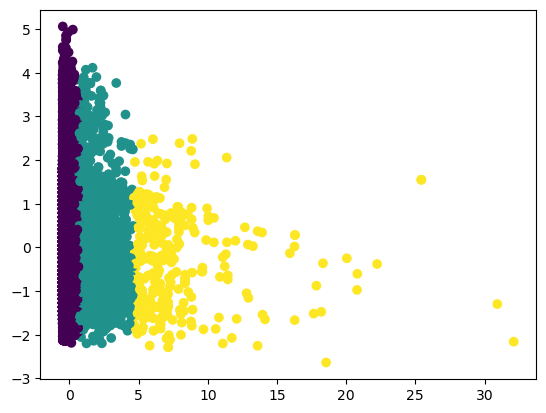

In [101]:
# Apply PCA and extract the first and second components
transformed_data = pca.fit_transform(marketing_data[features_to_explore])

marketing_data['x'] = transformed_data[:, 0]  # First principal component
marketing_data['y'] = transformed_data[:, 1]  # Second principal component

# Plot the scatter plot
plt.scatter(marketing_data['x'], marketing_data['y'], c=marketing_data['cluster'])
plt.show()


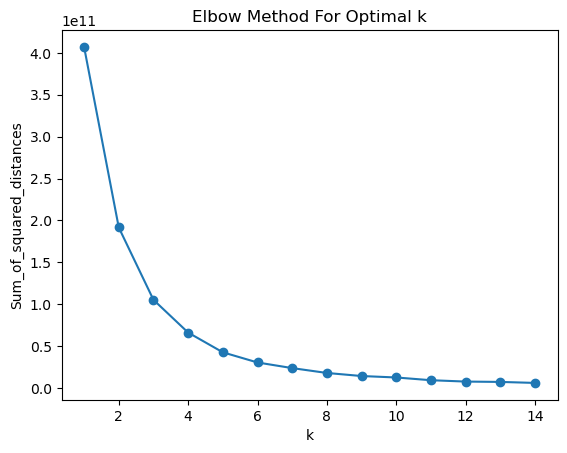

In [102]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None,n_init='auto')
    km = km.fit(marketing_data[features_to_explore])
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The Elbow Method is a technique used in clustering analysis (e.g., K-means clustering) to determine the optimal number of clusters (k) by balancing model complexity and explanatory power. The goal is to find the "elbow" point in a plot of Within-Cluster Sum of Squares (WCSS) vs. k k, where adding more clusters no longer significantly improves the model.

The optimal value of k in the elbow method is where the curve starts to bend ("elbow point") before flattening.
The y-axis represents the sum of squared distances (inertia), which measures how tightly data points are grouped in clusters.
The x-axis represents the number of clusters (k).
Initially, as k increases, inertia drops sharply (fewer clusters mean more compact groups).
After a certain k, the reduction in inertia slows down, meaning adding more clusters doesn’t significantly improve the clustering quality.
So we Choose k = 4 or 5 balances compact clusters with simplicity (avoiding too many unnecessary clusters).

## Let's try to use the Silhouette Coefficient
### A higher Silhouette Score means: Clusters are well-separated.


In [108]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster,n_init='auto').fit(marketing_data[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(marketing_data[features_to_explore], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.8514263786776057
For n_clusters=3, The Silhouette Coefficient is 0.7874874290309662
For n_clusters=4, The Silhouette Coefficient is 0.7618605569030431
For n_clusters=5, The Silhouette Coefficient is 0.7256701243500155
For n_clusters=6, The Silhouette Coefficient is 0.6928340585916253
For n_clusters=7, The Silhouette Coefficient is 0.6597852582110094
For n_clusters=8, The Silhouette Coefficient is 0.6542055763184165
For n_clusters=9, The Silhouette Coefficient is 0.6574807415072063
For n_clusters=10, The Silhouette Coefficient is 0.6359788415958778


Try the cluster number = 4

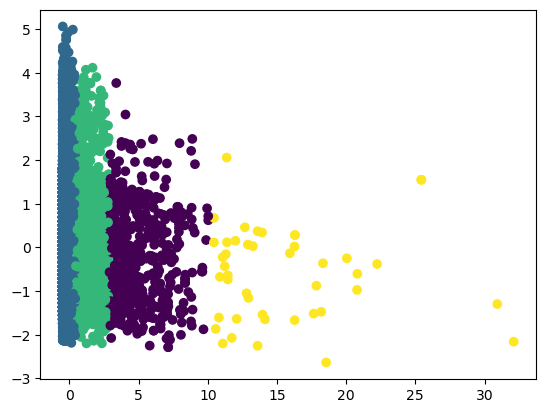

In [110]:
km = cluster.KMeans(n_clusters=4, max_iter=300, random_state=None,n_init='auto')
marketing_data['cluster'] = km.fit_predict(marketing_data[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=4, whiten=True)
pca.fit(marketing_data[features_to_explore])
marketing_data['x'] = pca.fit_transform(marketing_data[features_to_explore])[:, 0]
marketing_data['y'] = pca.fit_transform(marketing_data[features_to_explore])[:, 1]
plt.scatter(marketing_data['x'], marketing_data['y'], c=marketing_data['cluster'])
plt.show()

In [111]:
marketing_data['cluster'].unique()

array([1, 0, 2, 3])

<Axes: xlabel='cluster'>

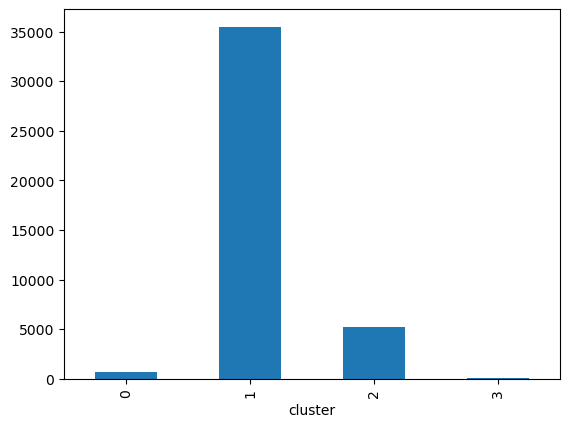

In [112]:
# Plot our Cluster Counts
marketing_data.groupby('cluster')['balance'].agg('count').plot(kind='bar')

In [128]:
# Filter and display all customers belonging to Cluster 1
cluster_1_customers = marketing_data[marketing_data['cluster'] == 1]
print(cluster_1_customers)


       age   job  marital  education  default  balance  housing  loan  \
0       58  <NA>     <NA>       <NA>     <NA>     2143      0.0   0.0   
1       44  <NA>     <NA>       <NA>     <NA>       29      0.0   0.0   
2       33  <NA>     <NA>       <NA>     <NA>        2      0.0   0.0   
3       47  <NA>     <NA>       <NA>     <NA>     1506      0.0   0.0   
4       33  <NA>     <NA>       <NA>     <NA>        1      0.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
45203   23  <NA>     <NA>       <NA>     <NA>      113      0.0   0.0   
45205   25  <NA>     <NA>       <NA>     <NA>      505      0.0   0.0   
45206   51  <NA>     <NA>       <NA>     <NA>      825      0.0   0.0   
45207   71  <NA>     <NA>       <NA>     <NA>     1729      0.0   0.0   
45209   57  <NA>     <NA>       <NA>     <NA>      668      0.0   0.0   

       contact  day  ...  pdays  previous  poutcome         y  age_group  \
0         <NA>    5  ...     -1         0      

Hierarchical Clustering

In [133]:
# Group by cluster and sum balances
cluster_balance = marketing_data.groupby("cluster")["balance"].sum()

# Compute percentage of total balance
total_balance = cluster_balance.sum()
cluster_balance_percentage = (cluster_balance / total_balance) * 100

# Combine results
cluster_summary = pd.DataFrame({
    "Total Balance": cluster_balance,
    "Percentage of Total": cluster_balance_percentage
})

# Display the summary
print(cluster_summary)


         Total Balance  Percentage of Total
cluster                                    
0             11167110            17.785971
1             23109395            36.806572
2             26304315            41.895154
3              2205236             3.512302


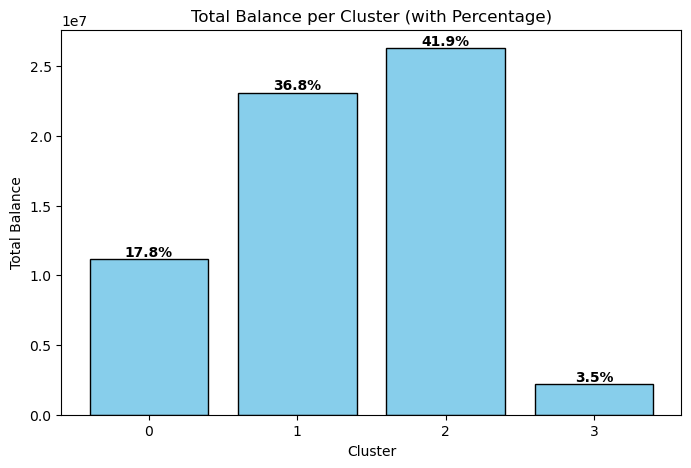

In [135]:
import matplotlib.pyplot as plt

# Group by cluster and sum balances
cluster_balance = marketing_data.groupby("cluster")["balance"].sum()

# Compute percentage of total balance
total_balance = cluster_balance.sum()
cluster_balance_percentage = (cluster_balance / total_balance) * 100

# Plot histogram (bar chart)
plt.figure(figsize=(8, 5))
bars = plt.bar(cluster_balance.index, cluster_balance, color='skyblue', edgecolor='black')

# Add percentage labels on top of bars
for bar, percentage in zip(bars, cluster_balance_percentage):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{percentage:.1f}%", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel("Cluster")
plt.ylabel("Total Balance")
plt.title("Total Balance per Cluster (with Percentage)")
plt.xticks(cluster_balance.index)  # Ensure all clusters are labeled

# Show the plot
plt.show()


In [137]:
# Filter and display all customers belonging to Cluster 2
cluster_2_customers = marketing_data[marketing_data['cluster'] == 2]
print(cluster_2_customers)

       age   job  marital  education  default  balance  housing  loan  \
65      51  <NA>     <NA>       <NA>     <NA>     6530      0.0   0.0   
70      57  <NA>     <NA>       <NA>     <NA>     5935      0.0   0.0   
186     40  <NA>     <NA>       <NA>     <NA>     4384      0.0   0.0   
187     54  <NA>     <NA>       <NA>     <NA>     4080      0.0   0.0   
205     50  <NA>     <NA>       <NA>     <NA>     5699      0.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
45185   60  <NA>     <NA>       <NA>     <NA>     4256      0.0   0.0   
45191   75  <NA>     <NA>       <NA>     <NA>     3810      0.0   0.0   
45204   73  <NA>     <NA>       <NA>     <NA>     2850      0.0   0.0   
45208   72  <NA>     <NA>       <NA>     <NA>     5715      0.0   0.0   
45210   37  <NA>     <NA>       <NA>     <NA>     2971      0.0   0.0   

       contact  day  ...  pdays  previous  poutcome         y  age_group  \
65        <NA>    5  ...     -1         0      

## Since the total balance is 41.9% the highest amount among the clusters, we suggest to target this cluster 2 for marketing campaigns 

## END